# Neural Networks with MNIST

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Prepare MNIST Data

In [3]:
train_data = dsets.MNIST(root='data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

test_data = dsets.MNIST(root='data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw



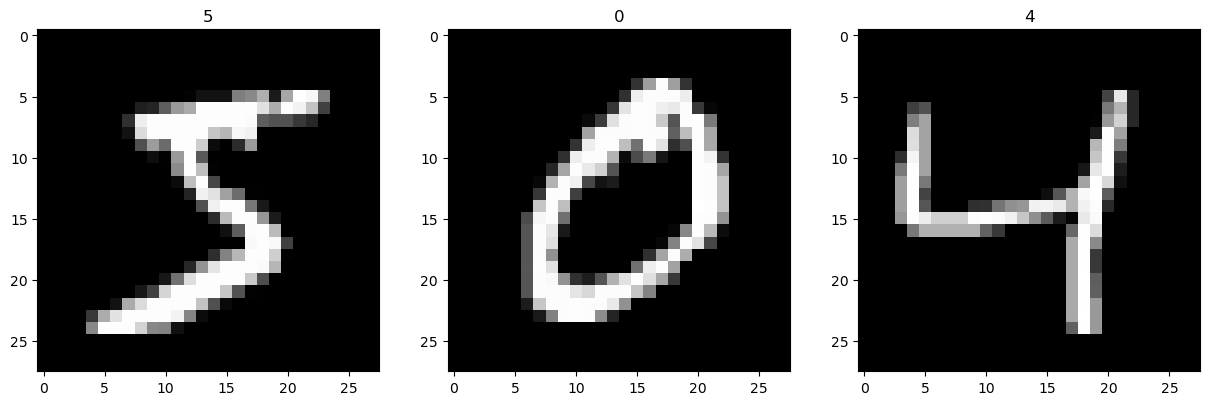

In [4]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title(train_data.targets[0].item())
ax1.imshow(train_data.data[0,:,:].numpy(), cmap='gray')

ax2.set_title(train_data.targets[1].item())
ax2.imshow(train_data.data[1,:,:].numpy(), cmap='gray')

ax3.set_title(train_data.targets[2].item())
ax3.imshow(train_data.data[2,:,:].numpy(), cmap='gray')

## 2. Make Batch Loader

In [5]:
batch_size = 100

train_loader  = DataLoader(dataset=train_data,
                           batch_size=batch_size,
                           shuffle=True)

In [6]:
batch_images, batch_labels = next(iter(train_loader))
print(batch_labels.numpy(), ", ", len(batch_labels.numpy()))

[7 3 7 9 1 3 9 0 7 3 4 4 0 7 4 6 3 4 4 6 1 8 9 1 1 9 1 3 3 6 3 1 1 3 7 7 2
 6 3 2 1 2 5 0 4 3 7 0 3 9 1 0 7 0 3 6 0 0 3 6 9 1 1 1 3 1 9 1 7 9 1 6 8 8
 8 8 9 0 2 2 5 4 0 0 6 3 5 9 5 3 2 8 5 4 1 9 0 9 3 8] ,  100


## 3. Define Model

In [7]:
model = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

In [8]:
loss = nn.CrossEntropyLoss()

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 4 Train Model

In [10]:
num_epochs = 5

In [11]:
for epoch in range(num_epochs):
    
    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.view(-1, 28 * 28)
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 300 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

Epoch [1/5], lter [300/600], Loss: 2.2441
Epoch [1/5], lter [600/600], Loss: 2.1708
Epoch [2/5], lter [300/600], Loss: 2.0828
Epoch [2/5], lter [600/600], Loss: 1.9818
Epoch [3/5], lter [300/600], Loss: 1.8667
Epoch [3/5], lter [600/600], Loss: 1.8014
Epoch [4/5], lter [300/600], Loss: 1.6542
Epoch [4/5], lter [600/600], Loss: 1.5883
Epoch [5/5], lter [300/600], Loss: 1.4745
Epoch [5/5], lter [600/600], Loss: 1.2770
Learning Finished!


## 5. Test Model

In [12]:
correct = 0
total = 0

for images, labels in test_data:
    
    images  = images.view(-1, 28 * 28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 79.100000 %


In [13]:
r = random.randint(0, len(test_data)-1)
X_single_data = test_data.data[r:r + 1].view(-1,28*28).float()
Y_single_data = test_data.targets[r:r + 1]

Label :  [7]
Prediction :  [7]


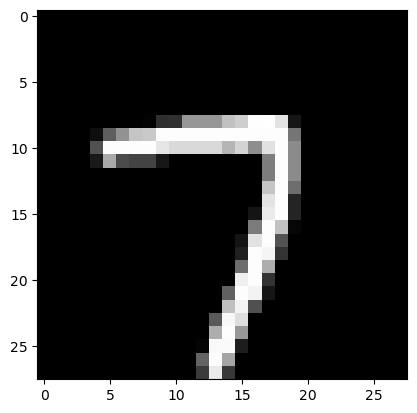

In [14]:
single_pre = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_pre.data, 1)[1].numpy())